# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [2]:
from keras import datasets

# Import Dataset

In [3]:
data = pd.read_csv("/content/sample_data/concrete_data.csv")
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
# we will copy the data to new dataframe to use it.
df = data.copy()
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# Split the Data to train & test & Validation

In [5]:
# we will split first the data into x & y
# y is the target column
y = df['Strength']
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

In [6]:
# Look at y
y.shape

(1030,)

In [7]:
x = df.drop('Strength' , axis = 1)
x

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [8]:
# Look at x.
x.shape

(1030, 8)

In [9]:
# second we will take 20% from the data to x_test & y_test Randomly.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# Look at the shape.
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((824, 8), (206, 8), (824,), (206,))

In [11]:
# Third split x_train & y_train into x_valid, y_valid & xnew_train, ynew_train.
# we will use it after splitting in the model.
xnew_train, x_valid, ynew_train, y_valid = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [12]:
# Look at the shape.
xnew_train.shape, x_valid.shape, ynew_train.shape, y_valid.shape

((576, 8), (248, 8), (576,), (248,))

Look at the Data

In [13]:
xnew_train

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
214,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,3
225,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14
15,380.0,0.0,0.0,228.0,0.0,932.0,670.0,90
439,173.8,93.4,159.9,172.3,9.7,1007.2,746.6,28
341,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,28
...,...,...,...,...,...,...,...,...
319,249.1,0.0,98.8,158.1,12.8,987.8,889.0,3
526,359.0,19.0,141.0,154.0,10.9,942.0,801.0,3
285,181.4,0.0,167.0,169.6,7.6,1055.6,777.8,14
743,397.0,0.0,0.0,186.0,0.0,1040.0,734.0,28


In [14]:
x_valid

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28
601,339.0,0.0,0.0,197.0,0.0,968.0,781.0,28
572,220.8,147.2,0.0,185.7,0.0,1055.0,744.3,7
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270
...,...,...,...,...,...,...,...,...
273,231.8,0.0,121.6,174.0,6.7,1056.4,778.5,100
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100
386,528.0,0.0,0.0,185.0,6.9,920.0,720.0,28


In [15]:
ynew_train

214     9.45
225    17.82
15     52.91
439    37.81
341    47.40
       ...  
319    15.36
526    23.64
285    21.60
743    36.94
357    66.82
Name: Strength, Length: 576, dtype: float64

In [16]:
y_valid

224     7.75
125    56.40
601    32.04
572    13.09
12     43.01
       ...  
273    45.84
20     41.84
228    39.23
386    56.83
773    37.42
Name: Strength, Length: 248, dtype: float64

# Train the model

Normalize

In [17]:
import statistics
header = list(data.columns.values)
for name in header:
  data[[name]] =  (data[[name]] - data[[name]].mean())/ (data[[name]].std())


In [18]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597,2.644123
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597,1.560663
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340,0.266498
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221,0.313188
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069,0.507732
...,...,...,...,...,...,...,...,...,...
1025,-0.045623,0.487998,0.564271,-0.092126,0.451190,-1.322363,-0.065861,-0.279597,0.506535
1026,0.392628,-0.856472,0.959602,0.675872,0.702285,-1.993711,0.496651,-0.279597,-0.277627
1027,-1.269472,0.759210,0.850222,0.521336,-0.017520,-1.035561,0.080068,-0.279597,-0.725377
1028,-1.168042,1.307430,-0.846733,-0.279443,0.852942,0.214537,0.191074,-0.279597,-0.182450


In [19]:
#  Design Model

from keras import layers

In [20]:
# Define Sequential model with 1 hidden layers

tf.random.set_seed(500)

model = keras.Sequential(
    [  
        layers.InputLayer(input_shape=(8,)),
        layers.Dense(10, activation="relu", name="hiddenlayer1"),
        layers.Dense(10, activation="relu", name="hiddenlayer2"),
        layers.Dense(10, activation="relu", name="hiddenlayer3"),
        layers.Dense(1, name="outputlayer"),
    ]
)

In [21]:
# Look at model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hiddenlayer1 (Dense)        (None, 10)                90        
                                                                 
 hiddenlayer2 (Dense)        (None, 10)                110       
                                                                 
 hiddenlayer3 (Dense)        (None, 10)                110       
                                                                 
 outputlayer (Dense)         (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


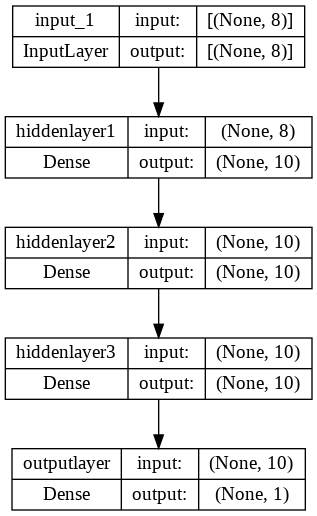

In [22]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file= 'model_plot.png', show_shapes = True, show_layer_names=True)

In [23]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='accuracy')

In [24]:
model_training = model.fit(x=xnew_train, y=ynew_train, batch_size=32, validation_data=(x_valid, y_valid), verbose=1, epochs=50)

Epoch 1/50
18/18 [==============================] - 2s 31ms/step - loss: 68250.9375 - accuracy: 0.0000e+00 - val_loss: 38701.3984 - val_accuracy: 0.0000e+00
Epoch 2/50
18/18 [==============================] - 0s 8ms/step - loss: 20299.6836 - accuracy: 0.0000e+00 - val_loss: 5761.3379 - val_accuracy: 0.0000e+00
Epoch 3/50
18/18 [==============================] - 0s 6ms/step - loss: 1857.2515 - accuracy: 0.0000e+00 - val_loss: 678.0529 - val_accuracy: 0.0000e+00
Epoch 4/50
18/18 [==============================] - 0s 7ms/step - loss: 755.0232 - accuracy: 0.0000e+00 - val_loss: 576.2147 - val_accuracy: 0.0000e+00
Epoch 5/50
18/18 [==============================] - 0s 10ms/step - loss: 443.9942 - accuracy: 0.0000e+00 - val_loss: 381.7224 - val_accuracy: 0.0000e+00
Epoch 6/50
18/18 [==============================] - 0s 7ms/step - loss: 379.0140 - accuracy: 0.0000e+00 - val_loss: 344.0259 - val_accuracy: 0.0000e+00
Epoch 7/50
18/18 [==============================] - 0s 7ms/step - loss: 337.43

In [25]:
# History
pd.DataFrame(model_training.history)

,loss,accuracy,val_loss,val_accuracy
0,68250.937500,0.0,38701.398438,0.0
1,20299.683594,0.0,5761.337891,0.0
2,1857.251465,0.0,678.052917,0.0
3,755.023193,0.0,576.214661,0.0
4,443.994232,0.0,381.722351,0.0
5,379.014038,0.0,344.025909,0.0
6,337.431274,0.0,319.648651,0.0
7,309.951843,0.0,295.352112,0.0
8,288.793549,0.0,277.506714,0.0
9,270.629456,0.0,262.582764,0.0


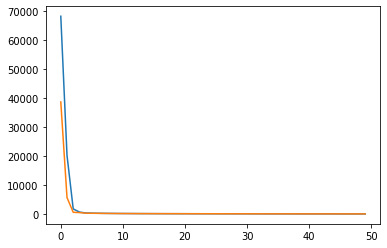

In [26]:
# Plot the Losses
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])

In [27]:
# Predection
pred = model.predict(x_test).argmax(axis=-1)
pred

7/7 [==============================] - 0s 3ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
# Evaluation
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 114.9587 - accuracy: 0.0000e+00


[114.95870208740234, 0.0]

In [29]:
# Evaluation by mean_squared_error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pred)

1529.1947844660197

In [30]:
i = 0
MSE = []
for i in range(50):
  model.fit(x=xnew_train, y=ynew_train, batch_size=32, validation_data=(x_valid, y_valid), verbose=1, epochs=50)
  pred = model.predict(x_test).argmax(axis=-1)
  MSE.append(mean_squared_error(y_test, pred))

Streaming output truncated to the last 5000 lines.
18/18 [==============================] - 0s 10ms/step - loss: 92.6454 - accuracy: 0.0000e+00 - val_loss: 101.9766 - val_accuracy: 0.0000e+00
Epoch 27/50
18/18 [==============================] - 0s 18ms/step - loss: 90.4044 - accuracy: 0.0000e+00 - val_loss: 106.8348 - val_accuracy: 0.0000e+00
Epoch 28/50
18/18 [==============================] - 0s 16ms/step - loss: 95.0169 - accuracy: 0.0000e+00 - val_loss: 111.0148 - val_accuracy: 0.0000e+00
Epoch 29/50
18/18 [==============================] - 0s 15ms/step - loss: 93.8100 - accuracy: 0.0000e+00 - val_loss: 103.1902 - val_accuracy: 0.0000e+00
Epoch 30/50
18/18 [==============================] - 0s 10ms/step - loss: 89.6458 - accuracy: 0.0000e+00 - val_loss: 100.5195 - val_accuracy: 0.0000e+00
Epoch 31/50
18/18 [==============================] - 0s 8ms/step - loss: 89.7275 - accuracy: 0.0000e+00 - val_loss: 103.1183 - val_accuracy: 0.0000e+00
Epoch 32/50
18/18 [=========================

In [31]:
import statistics
print("Mean of MSE = " + str(statistics.mean(MSE)))
print("STDVE of MSE = " + str(statistics.stdev(MSE)))

Mean of MSE = 1529.1947844660197
STDVE of MSE = 0.0
